# 비선형 활성화 함수를 쓰는 비선형 오토인코더 모델

# 1. 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/wjdwl/Desktop/Data/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [8]:
df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Columns: 272 entries, T_xacc_mean to people
dtypes: float64(270), object(2)
memory usage: 18.9+ MB


In [12]:
# 결측치 확인
df.isnull().values.any()

False

# 2. 필요한 데이터 추출

In [15]:
# Normal - lyingBack,lyingRigh
# Abnormal - sitting
print(df['activity'].unique())

['sitting' 'standing' 'lyingBack' 'lyingRigh' 'ascendingStairs'
 'decendingStairs' 'standingInElevatorStill' 'movingInElevator'
 'walkingLot' 'walkingTreadmillFlat' 'walkingTreadmillIncline'
 'runningTreadmill' 'stepper' 'crossTrainer' 'cyclingHorizontal'
 'cyclingVertical' 'rowing' 'jumping' 'basketBall']


In [17]:
# activity 열에서 'lyingBack', 'lyingRigh', 'sitting' 만 추출하기
df = df[df['activity'].isin(['lyingBack', 'lyingRigh', 'sitting'])]
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,lyingRigh,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,lyingRigh,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,lyingRigh,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,lyingRigh,p8


In [19]:
# 제대로 원하는 값들이 추출되었는지 확인하는 과정
df['activity'].unique(), df.shape, df['activity'].value_counts()

(array(['sitting', 'lyingBack', 'lyingRigh'], dtype=object),
 (1440, 272),
 activity
 sitting      480
 lyingBack    480
 lyingRigh    480
 Name: count, dtype: int64)

# 3. activity 열 전처리

In [22]:
# 정상 데이터 0, 비정상 데이터 1

In [24]:
# 'activity' 열 전처리: lyingBack, lyingRigh -> 정상 (0), sitting -> 비정상 (1)
df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})
df

C:\Users\wjdwl\AppData\Local\Temp\ipykernel_19612\1868954632.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})
C:\Users\wjdwl\AppData\Local\Temp\ipykernel_19612\1868954632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,0,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,0,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,0,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,0,p8


C:\Users\wjdwl\AppData\Local\Temp\ipykernel_19612\772620750.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


Text(0, 0.5, 'Frequency')

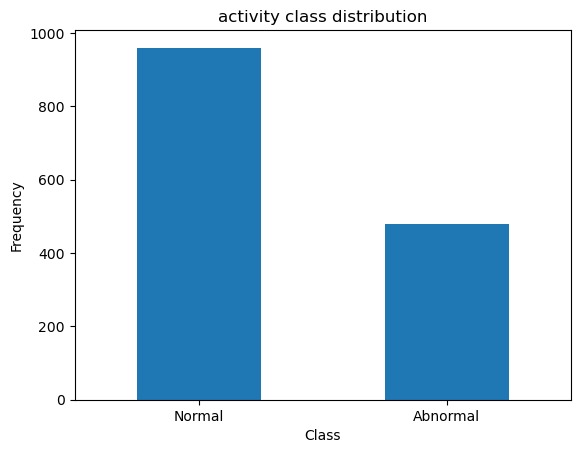

In [28]:
# 비율 확인
LABELS = ["Normal","Abnormal"]
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("activity class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

# 4. 훈련, 검증, 테스트 분리 및 정규화

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test = train_test_split(df, test_size=0.2,shuffle=True, random_state=42)
x_train, x_valid = train_test_split(x_train, test_size=0.2,shuffle=True, random_state=42)

# 정상 데이터(0)만 사용하여 학습에 활용 (lyingBack, lyingRight)
# values를 통해 넘파이 배열로 바꿔주기
x_train = x_train[x_train.activity == 0]
x_train = x_train.drop(['activity', 'people'], axis=1).values

x_valid = x_valid[x_valid.activity == 0]
x_valid = x_valid.drop(['activity', 'people'], axis=1).values

# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
y_test = x_test['activity']  # 테스트 데이터에서 활동 라벨만 남기기
x_test = x_test.drop(['activity', 'people'], axis=1).values

x_train.shape, x_valid.shape, x_test.shape, y_test.shape

((607, 270), (156, 270), (288, 270), (288,))

In [35]:
# StandardScaler로 데이터 정규화
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

x_train.shape, x_valid.shape, x_test.shape

((607, 270), (156, 270), (288, 270))

# 5. 비선형 대칭 오토인코더 모델 만들기

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

### 비선형 활성화 함수 ReLU, Sigmoid 등을 적용해서 인코더와 디코더의 구조가 대칭인 오토인코더 구성

In [41]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_symmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    decoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
autoencoder = non_linear_symmetric_autoencoder(input_dim, encoding_dim)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 27)                  │           7,317 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 270)                 │           3,780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,643 (45.48 KB)

 Trainable params: 11,643 (45.48 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 모델 학습
history = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.1610 - val_loss: 0.9209
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2528 - val_loss: 0.8259
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2219 - val_loss: 0.6925
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1381 - val_loss: 0.6253
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0128 - val_loss: 0.6060
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7522 - val_loss: 0.5987
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0586 - val_loss: 0.5932
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6706 - val_loss: 0.5891
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7222 - val_loss: 0.5855
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9426 - val_loss: 0.5805
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8182 - val_loss: 0.5752
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8807 - val_l

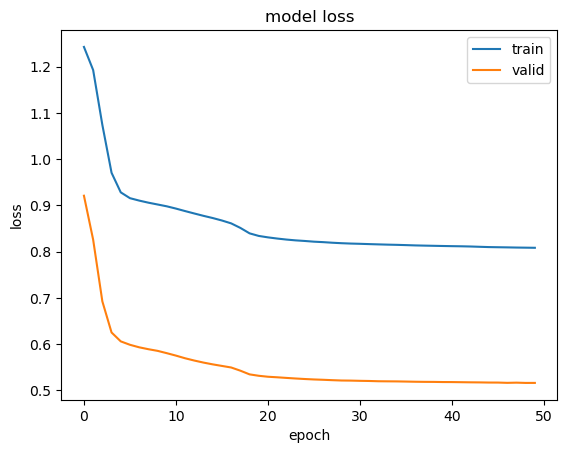

In [45]:
# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

# 결과

In [48]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.717420,0.315972
std,42.408570,0.465711
min,0.135609,0.000000
25%,0.304320,0.000000
50%,0.447370,0.000000
75%,0.921133,1.000000
max,712.043842,1.000000


In [50]:
error_df.head()

,reconstruction_error,true_class
0,0.974296,1
1,0.471402,0
2,0.631780,0
3,1.405020,1
4,0.443153,0


In [52]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()
# 정상 최소 0.13, 최대 8.83, 3분위수 값 0.44값 아래로 데이터의 75%가 분포해 있음

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.491362,0.0
std,0.822523,0.0
min,0.135609,0.0
25%,0.280590,0.0
50%,0.320519,0.0
75%,0.449016,0.0
max,8.830526,0.0


In [54]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()
# 비정상 데이터 최소 0.48, 최대 712, 3분위수 값을 통해 데이터의 75%가 1.28 아래 있음.

# 최적의 threshold 0.4~0.5사이

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.701305,1.0
std,75.243630,0.0
min,0.480871,1.0
25%,0.861018,1.0
50%,0.979353,1.0
75%,1.284368,1.0
max,712.043842,1.0


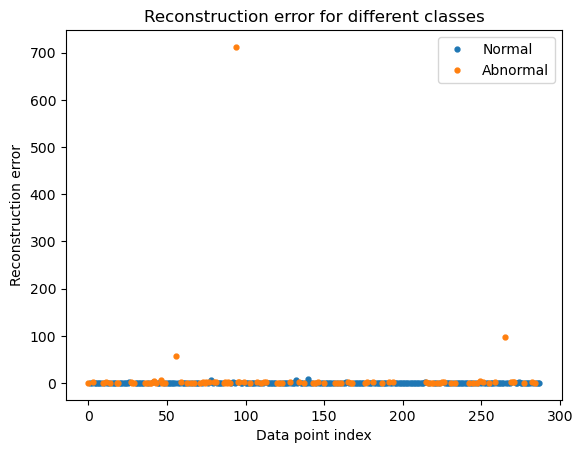

In [56]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

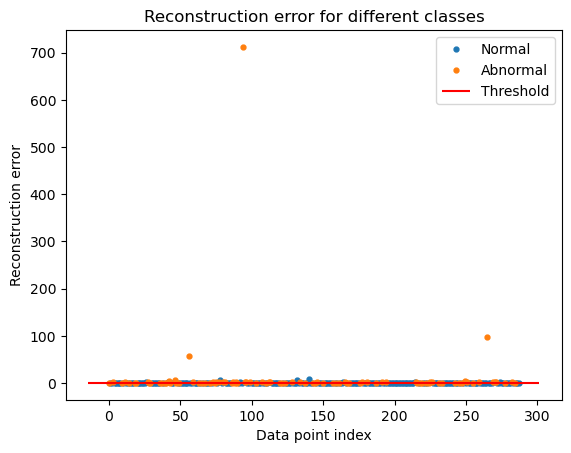

In [58]:
# threshold 값을 조정하여 최선의 정확도를 얻음,

threshold =0.5
     

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

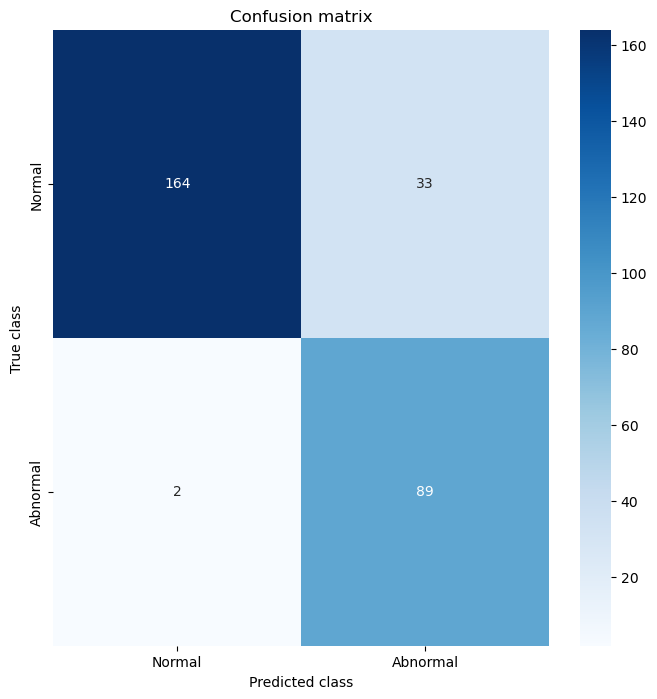

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       197
           1       0.73      0.98      0.84        91

    accuracy                           0.88       288
   macro avg       0.86      0.91      0.87       288
weighted avg       0.91      0.88      0.88       288



In [60]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

### 7. 비선형 비대칭 오토인코더 모델### 
비선형 형태의 인코더 디코더의 구조가 비대칭인 오토인코더 모델로 위에서 수행한 비선형 대칭 오토인코더와 비교를 해본다# 

차원 축소는 빠르게 하고(인코더), 복원 과정은 더 많은 층 또는 차원을 통해 더 많은 단계를 거치게 한다(디코더)

In [65]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_asymmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    # 첫 번째 인코더 층
    encoded = Dense(int(encoding_dim*2), activation='relu')(input_layer)
    # 두 번째 인코더 층(최종 압축)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)

    # 첫 번째 디코더 층
    decoded = Dense(int(encoding_dim), activation='relu')(encoded)
    # 두 번째 디코더 층
    decoded = Dense(int(encoding_dim*2), activation='relu')(decoded)
    # 세번째 디코더 층(최종 복원 층)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
asy_autoencoder = non_linear_asymmetric_autoencoder(input_dim, encoding_dim)

asy_autoencoder.compile(optimizer='adam', loss='mse')
asy_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 54)                  │          14,634 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             715 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 27)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 54)                  │           1,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 270)                 │          14,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,089 (125.35 KB)

 Trainable params: 32,089 (125.35 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history2 = asy_autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.2262 - val_loss: 0.8733
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1501 - val_loss: 0.6711
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1009 - val_loss: 0.6104
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0744 - val_loss: 0.5944
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1064 - val_loss: 0.5853
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7197 - val_loss: 0.5757
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0663 - val_loss: 0.5671
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1847 - val_loss: 0.5580
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1131 - val_loss: 0.5461
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8521 - val_loss: 0.5345
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7643 - val_loss: 0.5264
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9575 - val_l

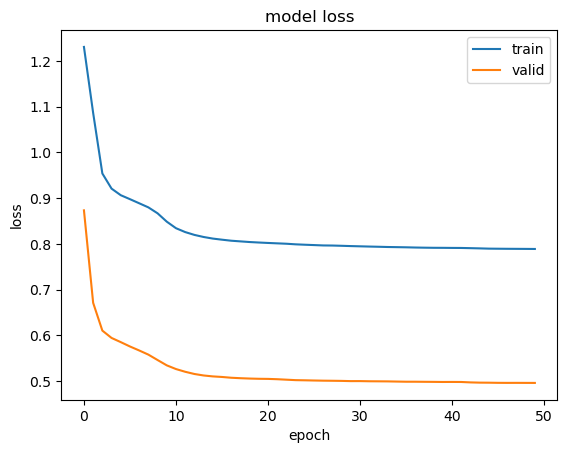

In [68]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [70]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = asy_autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.704818,0.315972
std,42.400739,0.465711
min,0.126470,0.000000
25%,0.285864,0.000000
50%,0.414783,0.000000
75%,0.867920,1.000000
max,711.877459,1.000000


In [73]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.475210,0.0
std,0.834496,0.0
min,0.126470,0.0
25%,0.264527,0.0
50%,0.310765,0.0
75%,0.419876,0.0
max,8.932732,0.0


In [75]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.696388,1.0
std,75.228213,0.0
min,0.469443,1.0
25%,0.844965,1.0
50%,0.967078,1.0
75%,1.308522,1.0
max,711.877459,1.0


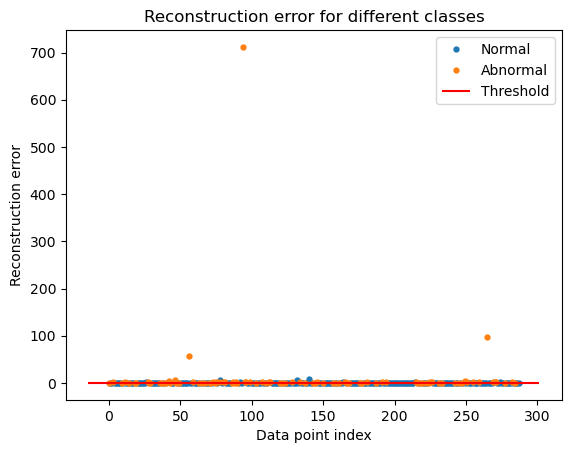

In [77]:
threshold = 0.5
     

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

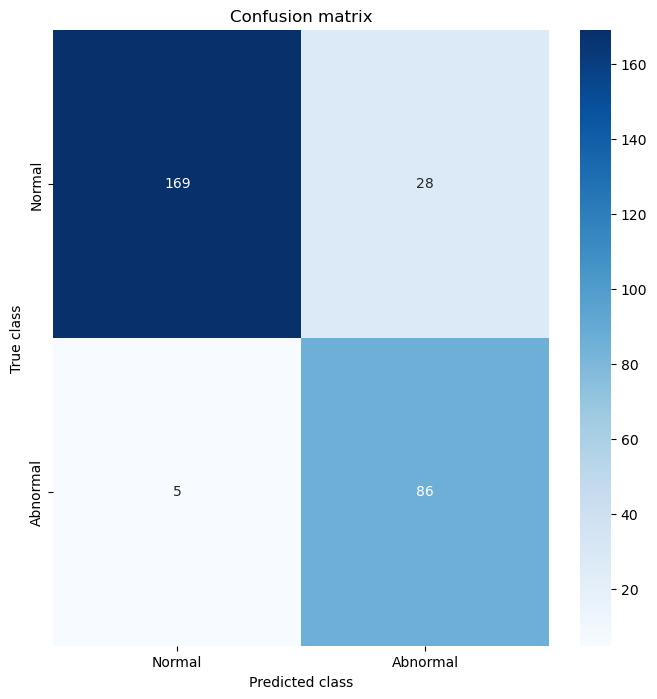

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       197
           1       0.75      0.95      0.84        91

    accuracy                           0.89       288
   macro avg       0.86      0.90      0.88       288
weighted avg       0.90      0.89      0.89       288



In [79]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))